In [63]:
# Import Analysis Packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### EDA
- 4 Models on the separate Parkison Metrics
- Protein & Peptide Data for Each Visit

##### Peptide EDA

In [64]:
# Peptide Data

peptide_df = pd.read_csv('train_peptides.csv')
print(peptide_df.shape)
peptide_df.head()

(981834, 6)


,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7


##### Protein EDA

In [65]:
# Protein Data

protein_df = pd.read_csv('train_proteins.csv')
print(protein_df.shape)
protein_df.head()

(232741, 5)


,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0


In [66]:
# Filter Dataframe for patient 55

patient_55_protein = protein_df[protein_df['patient_id'] == 55]

In [67]:
# Get unique patient_ids

print(protein_df['patient_id'].unique())

[   55  1517  1923  2660  3636  3863  4161  4172  5027  5178  5645  5742
  6054  6211  7051  7117  7568  7832  8699 10053 10174 10541 10715 10718
 11459 11686 11928 12516 12636 12703 12755 13368 13618 13968 14035 14124
 14242 14450 14811 15009 15504 15590 16238 16347 16566 16574 17154 17414
 17727 18183 18204 18553 18560 19088 20212 20216 20352 20404 20664 20791
 21126 21537 21729 22126 22623 23192 23244 23391 23636 24278 24690 24820
 24911 25562 25739 25750 25827 25911 26005 26104 26210 26809 27079 27300
 27464 27468 27715 27971 28327 28342 28818 29313 29417 30119 30155 30416
 30894 30951 31121 31154 31693 33548 33558 34182 35231 35465 35477 35675
 35696 36797 37312 37566 38419 39144 40022 40200 40340 40751 40874 40967
 41444 41617 41628 41871 41883 41930 42003 42385 42579 44001 44154 44682
 45161 45181 46837 47103 47513 47881 48780 48928 49239 49672 49683 49995
 50611 50907 51243 51879 51893 51899 52266 53103 54095 54406 55240 55256
 55302 55662 56073 56075 56119 56317 56675 56691 56

##### Patient 55

In [68]:
# Print the Unique visit_id and visit_month
print(patient_55_protein['visit_id'].unique())
print(patient_55_protein['visit_month'].unique())

['55_0' '55_6' '55_12' '55_36']
[ 0  6 12 36]


In [69]:
# Calculate the change in protein levels from each visit 

zero = patient_55_protein[patient_55_protein['visit_month'] == 0]
six = patient_55_protein[patient_55_protein['visit_month'] == 6]
tweleve = patient_55_protein[patient_55_protein['visit_month'] == 12]
thirty_six = patient_55_protein[patient_55_protein['visit_month'] == 36]

# Z_Score the NPX

zero['NPX'] = (zero['NPX'] - zero['NPX'].mean())/zero['NPX'].std()
six['NPX'] = (six['NPX'] - six['NPX'].mean())/six['NPX'].std()
tweleve['NPX'] = (tweleve['NPX'] - tweleve['NPX'].mean())/tweleve['NPX'].std()
thirty_six['NPX'] = (thirty_six['NPX'] - thirty_six['NPX'].mean())/thirty_six['NPX'].std()

# Merge the dataframes together

protein_df = pd.merge(zero, six, on='UniProt', how='inner')
protein_df = pd.merge(protein_df, tweleve, on='UniProt', how='inner')
protein_df = pd.merge(protein_df, thirty_six, on='UniProt', how='inner')

# Rename the columns

protein_df.columns = ['visit_id_x', 'visit_month_x', 'patient_id_x', 'UniProt', 'zero', 'patient_id_y', 'visit_id_y', 'visit_month_y', 'six', 'patient_id', 'visit_id', 'visit_month', 'twelve', 'patient_id', 'visit_id', 'visit_month', 'thirty_six']

protein_df.head()

# Calculate the change in protein levels from each visit

protein_df['change_6'] = protein_df['six'] - protein_df['zero']
protein_df['change_12'] = protein_df['twelve'] - protein_df['zero']
protein_df['change_36'] = protein_df['thirty_six'] - protein_df['zero']

protein_df.head()

# Create Changes DF

changes = protein_df[['UniProt', 'change_6', 'change_12', 'change_36']]

changes.head()

C:\Users\commo\AppData\Local\Temp\ipykernel_24988\2016690963.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero['NPX'] = (zero['NPX'] - zero['NPX'].mean())/zero['NPX'].std()
C:\Users\commo\AppData\Local\Temp\ipykernel_24988\2016690963.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  six['NPX'] = (six['NPX'] - six['NPX'].mean())/six['NPX'].std()
C:\Users\commo\AppData\Local\Temp\ipykernel_24988\2016690963.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

,UniProt,change_6,change_12,change_36
0,O00391,-0.003893,-0.001235,0.006626
1,O00533,-0.005063,0.002395,0.004009
2,O00584,-0.004031,-0.001285,0.006537
3,O14498,-0.003849,-0.001430,0.006480
4,O14773,-0.004095,-0.001392,0.006538


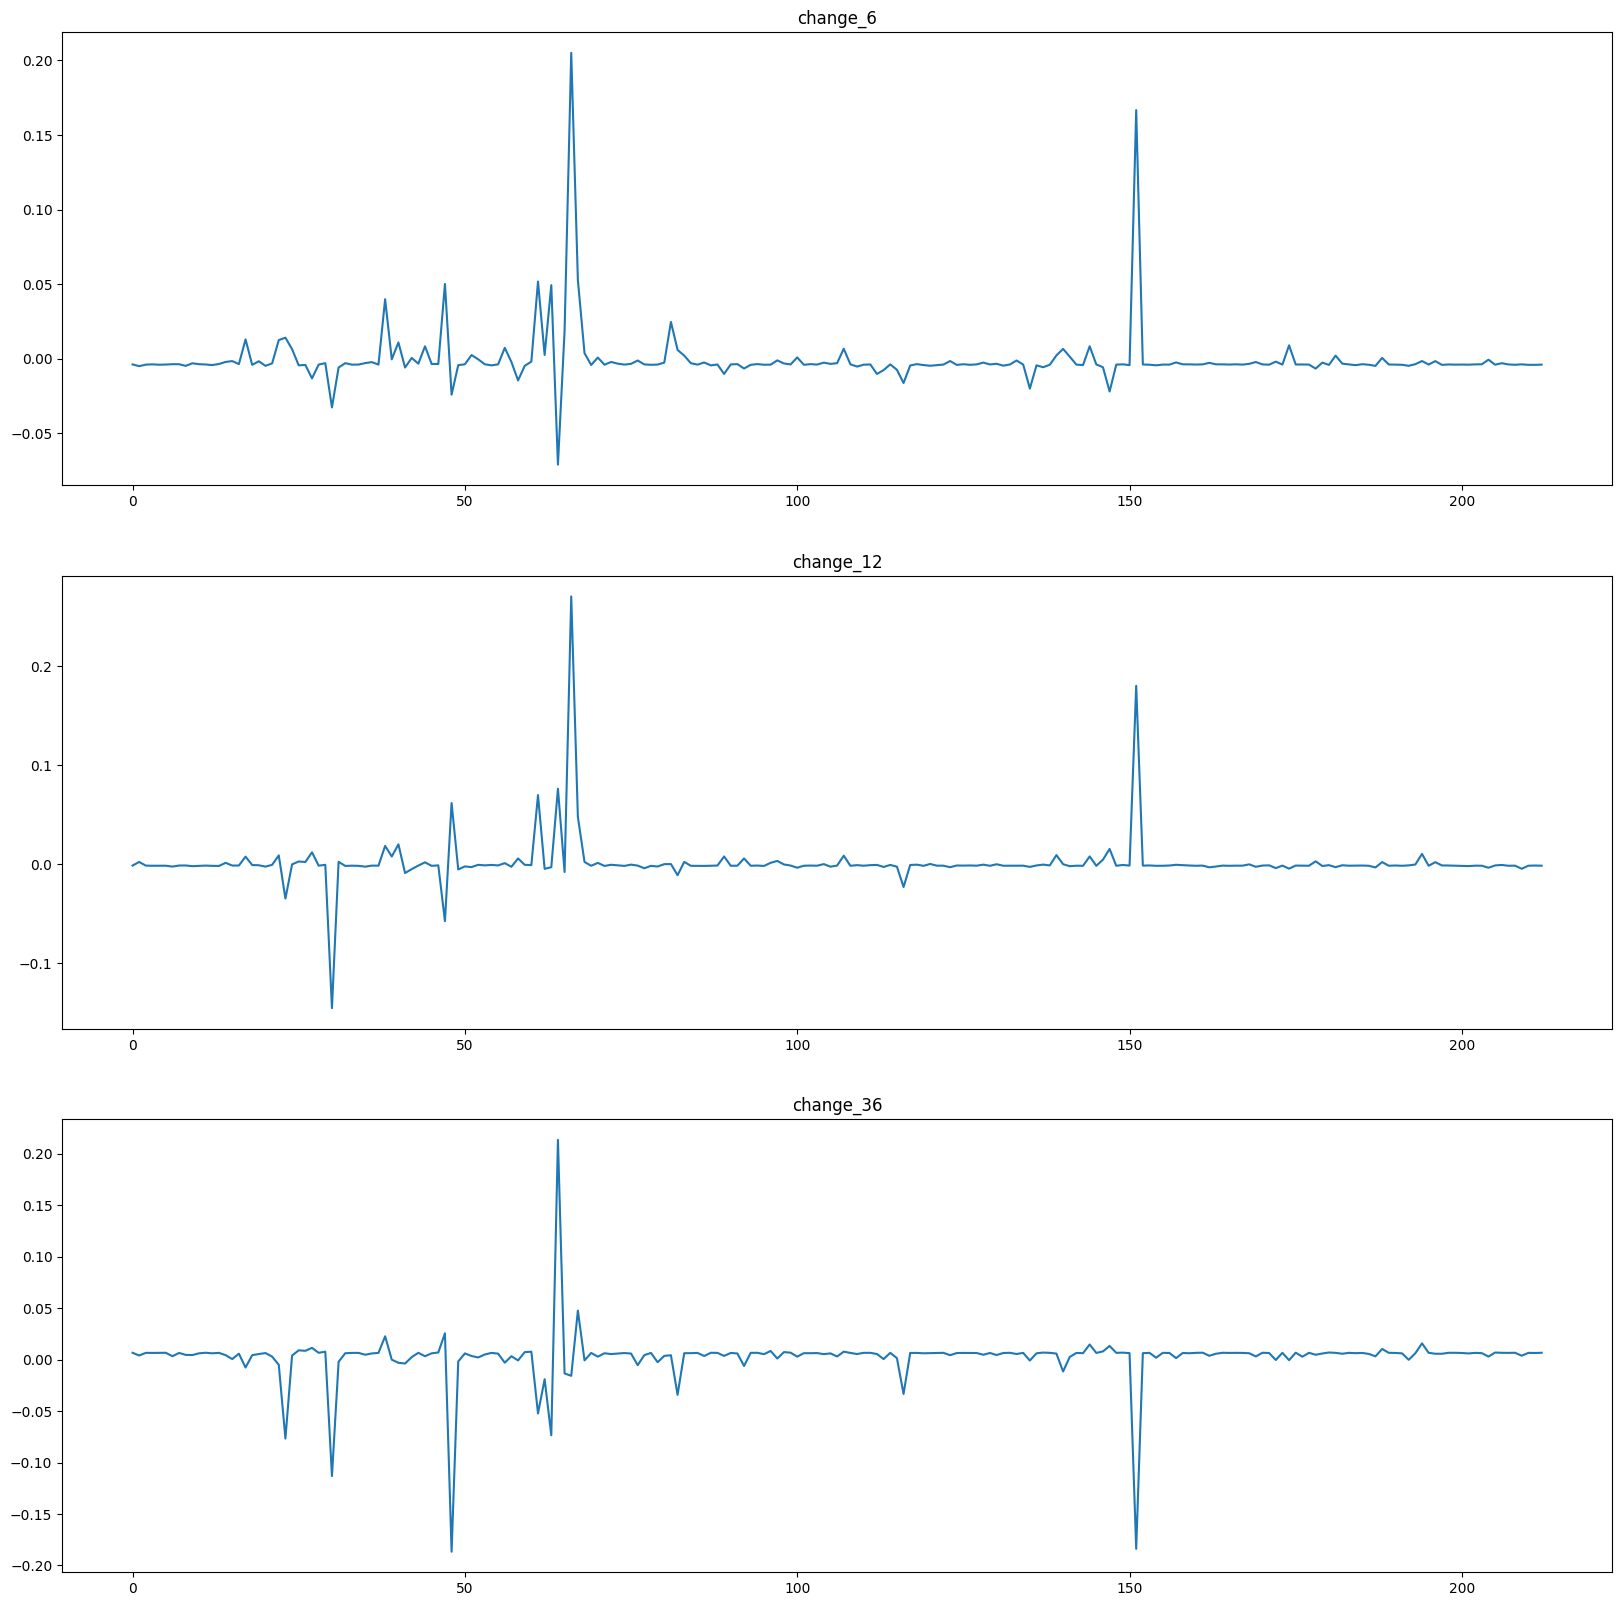

In [70]:
# Plot 3 levels of changes in protein levels

fig, ax = plt.subplots(3, 1, figsize=(20, 20))

for i, col in enumerate(changes.columns[1:]):
    ax[i].plot(changes[col])
    ax[i].set_title(col)

In [71]:
# Retrieve the values of changes greater than .15 and less than -.15

significant_changes = changes[(changes['change_6'] > .15) | (changes['change_6'] < -.15) | (changes['change_12'] > .15) | (changes['change_12'] < -.15) | (changes['change_36'] > .15) | (changes['change_36'] < -.15)]

significant_changes.head()

,UniProt,change_6,change_12,change_36
48,P02649,-0.024186,0.061925,-0.186639
64,P02768,-0.071122,0.076389,0.213432
66,P02787,0.205091,0.270594,-0.015794
151,P41222,0.166699,0.180287,-0.183849


C:\Users\commo\AppData\Local\Temp\ipykernel_24988\45647992.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_month['NPX'] = (patient_month['NPX'] - patient_month['NPX'].mean())/patient_month['NPX'].std()
C:\Users\commo\AppData\Local\Temp\ipykernel_24988\45647992.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_month['NPX'] = (patient_month['NPX'] - patient_month['NPX'].mean())/patient_month['NPX'].std()
C:\Users\commo\AppData\Local\Temp\ipykernel_24988\45647992.py:7: SettingWithCopyWarn

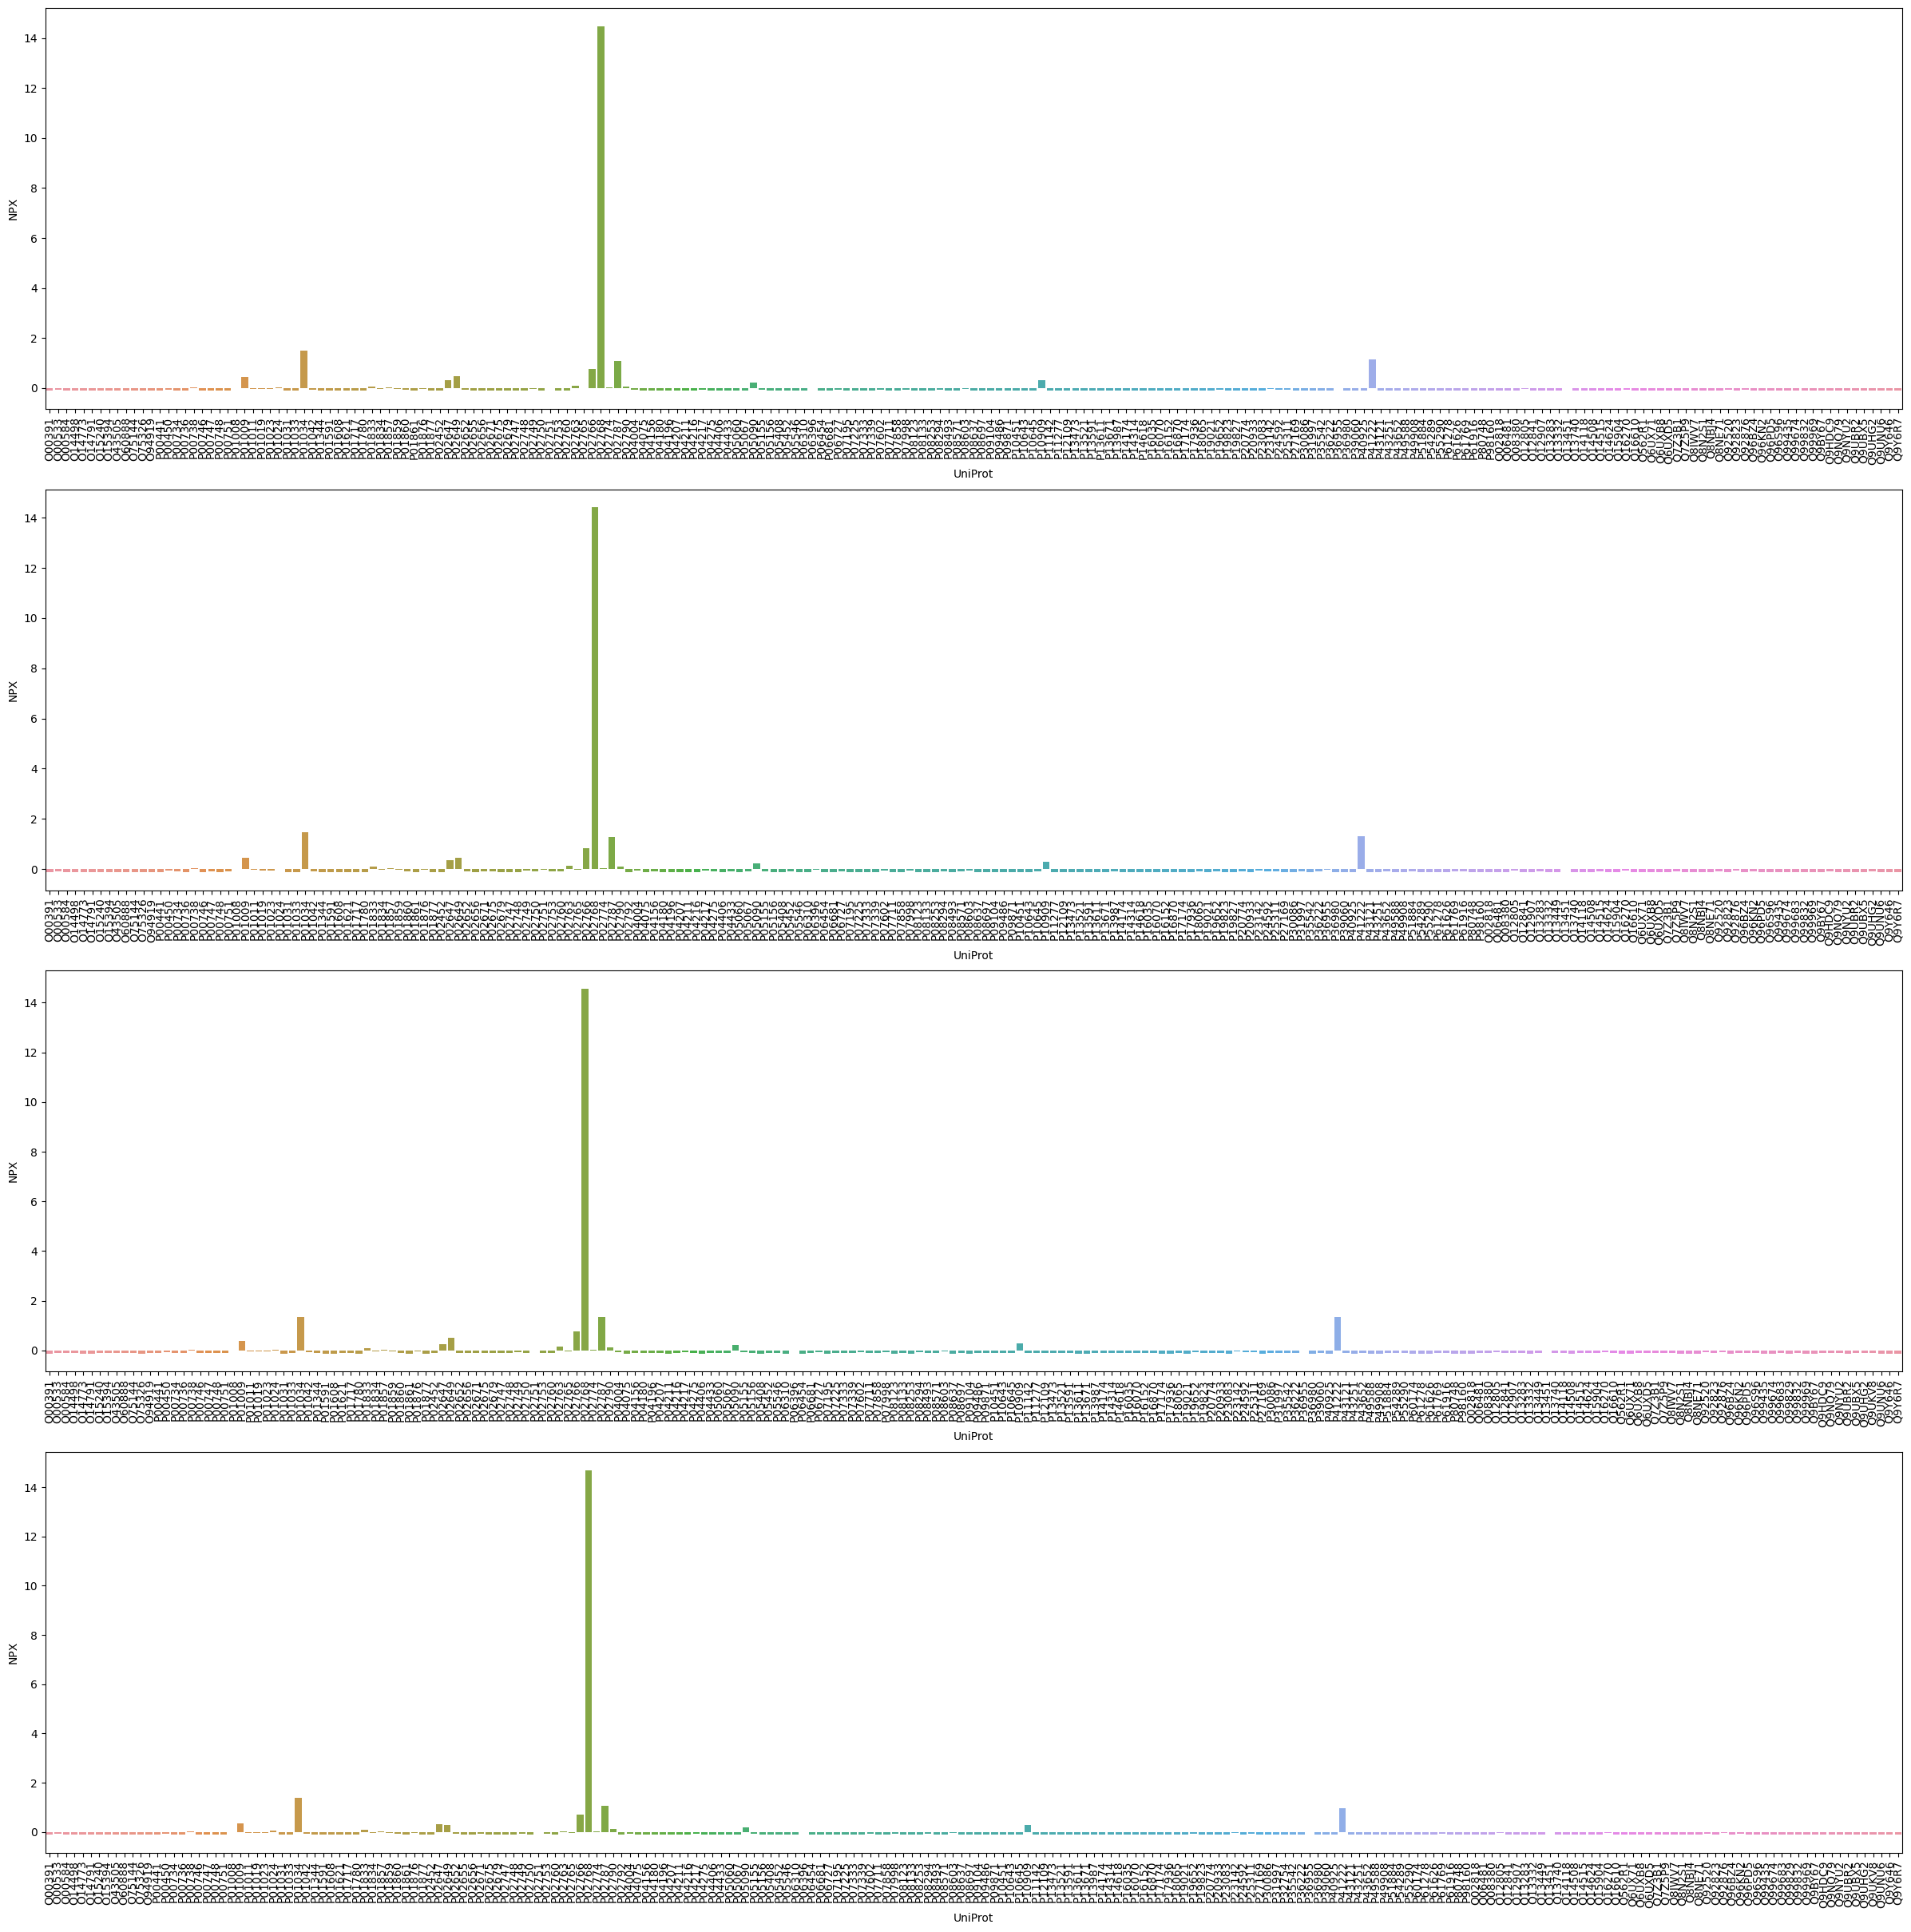

In [72]:
# Graph 4 Bar Plots for each visit_month

fig, ax = plt.subplots(4, 1, figsize=(30, 30))

for i, month in enumerate(patient_55_protein['visit_month'].unique()):
    patient_month = patient_55_protein[patient_55_protein['visit_month'] == month]
    patient_month['NPX'] = (patient_month['NPX'] - patient_month['NPX'].mean())/patient_month['NPX'].std()
    sns.barplot(x='UniProt', y='NPX', data=patient_month, ax=ax[i])
    plt.setp(ax[i].get_xticklabels(), rotation=90)

In [73]:
# For all patients, create a clustermap of the protein levels for each visit_month



##### Patient EDA

In [74]:
# Clinical Data 

clinical_df = pd.read_csv('train_clinical_data.csv')
print(clinical_df.shape)
clinical_df.fillna(0, inplace=True)
clinical_df.head()


(2615, 8)


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,0.0,0
1,55_3,55,3,10.0,7.0,25.0,0.0,0
2,55_6,55,6,8.0,10.0,34.0,0.0,0
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On


In [76]:
# Filter rows where updrs_4 is not 0

clinical_df_nan = clinical_df[clinical_df['updrs_4'] != 0]

clinical_df_nan.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
27,942_96,942,96,6.0,9.0,39.0,3.0,Off
28,1517_0,1517,0,11.0,6.0,25.0,5.0,On
29,1517_6,1517,6,17.0,4.0,30.0,7.0,On
30,1517_12,1517,12,20.0,11.0,32.0,5.0,On
31,1517_18,1517,18,23.0,14.0,25.0,5.0,On


In [77]:
# Filter Dataframe for patient 55

patient_55_clinical = clinical_df[clinical_df['patient_id'] == 55]

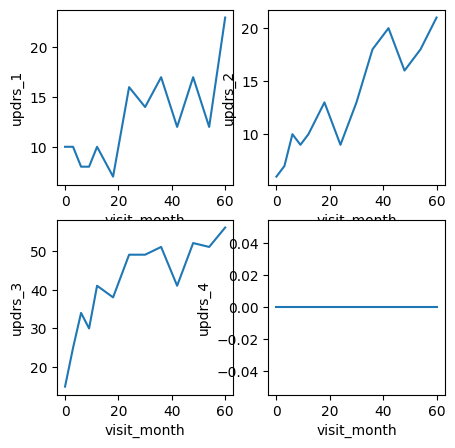

In [78]:
# For each updrs_x column, plot a line graph

fig, ax = plt.subplots(2, 2, figsize=(5, 5))

for i, col in enumerate(patient_55_clinical.columns[3:7]):
    sns.lineplot(x='visit_month', y=col, data=patient_55_clinical, ax=ax[i//2, i%2])

### Modelling

- How Updrs_4 is imputed / predicted will be imported for Linear Models
- Could use Non-linear Regression Models

##### Linear Regression

- Create 4 Linear Regression Models for Updrs 1, 2, 3 and 4 using Month

In [79]:
# Import Scikit Learn Packages

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [82]:
model = {}
target = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]

for u in target:
        
    # Drop NAs
    temp = clinical_df.dropna(subset=[u]) 
    
    # Train data
    X = temp['visit_month']
    y = temp[u]
        
    trained = LinearRegression().fit(X.values.reshape(-1, 1), y)
    
    # Save model
    model[u] = trained


In [83]:
def get_predictions(my_train, pro, model):

    # Forecast
    my_train = my_train.fillna(0)
    
    for u in target:
        
        # Here is where we will save the final results
        my_train['result_' + str(u)] = 0
  
        # Predict    
        X = my_train["visit_month"]
        
        my_train['result_' + str(u)] = np.ceil(model[u].predict(X.values.reshape(-1, 1)))

        
    # Format for final submission
    result = pd.DataFrame()

    for m in [0, 6, 12, 24]:
        for u in [1, 2, 3, 4]:

            temp = my_train[["visit_id", "result_updrs_" + str(u)]]
            temp["prediction_id"] = temp["visit_id"] + "_updrs_" + str(u) + "_plus_" + str(m) + "_months"
            temp["rating"] = temp["result_updrs_" + str(u)]
            temp = temp [['prediction_id', 'rating']]

            result = result.append(temp)            
    result = result.drop_duplicates(subset=['prediction_id', 'rating'])

    return result

# Run once to check results
get_predictions(clinical_df, None, model)

### Submission Code

In [84]:
env = amp_pd_peptide.make_env()   # initialize the environment
iter_test = env.iter_test()  

0.3567533495697333
0.43427337603776617
0.373834562863965
0.8816792554361376


In [ ]:
for (test, test_peptides, test_proteins, sample_submission) in iter_test:
        
    result = get_predictions(test, test_proteins, model)

    env.predict(result)   # register your predictions